In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions =  pd.read_csv('transactions_train.csv')
sample =  pd.read_csv('sample_submission.csv')

### Articles Data Description
- article_id : A unique identifier of every article.
- product_code, prod_name : A unique identifier of every product and its name (not the same).
- product_type, product_type_name : The group of product_code and its name
- graphical_appearance_no, graphical_appearance_name : The group of graphics and its name
- colour_group_code, colour_group_name : The group of color and its name
- perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : The added color info
- department_no, department_name: : A unique identifier of every dep and its name
- index_code, index_name: : A unique identifier of every index and its name
- index_group_no, index_group_name: : A group of indeces and its name
- section_no, section_name: : A unique identifier of every section and its name
- garment_group_no, garment_group_name: : A unique identifier of every garment and its name
- detail_desc: : Details

In [7]:
len(articles.article_id.unique())

105542

In [12]:
# Count the total Number of 
for column in articles.columns:
    if not 'no' in column and not 'code' in column and not 'id' in column:
        x = articles[column].nunique()
        print(f'Number of Unique Values {column}: {x}')

Number of Unique Values prod_name: 45875
Number of Unique Values product_type_name: 131
Number of Unique Values product_group_name: 19
Number of Unique Values graphical_appearance_name: 30
Number of Unique Values colour_group_name: 50
Number of Unique Values perceived_colour_value_name: 8
Number of Unique Values perceived_colour_master_name: 20
Number of Unique Values department_name: 250
Number of Unique Values index_name: 10
Number of Unique Values index_group_name: 5
Number of Unique Values section_name: 56
Number of Unique Values garment_group_name: 21
Number of Unique Values detail_desc: 43404


#### Preliminary Findings
- Out of all the index names, ladieswear has the highest frequency.
- Jersey Fancy is the most popular garment group
- Baby group has the most sub categories for index

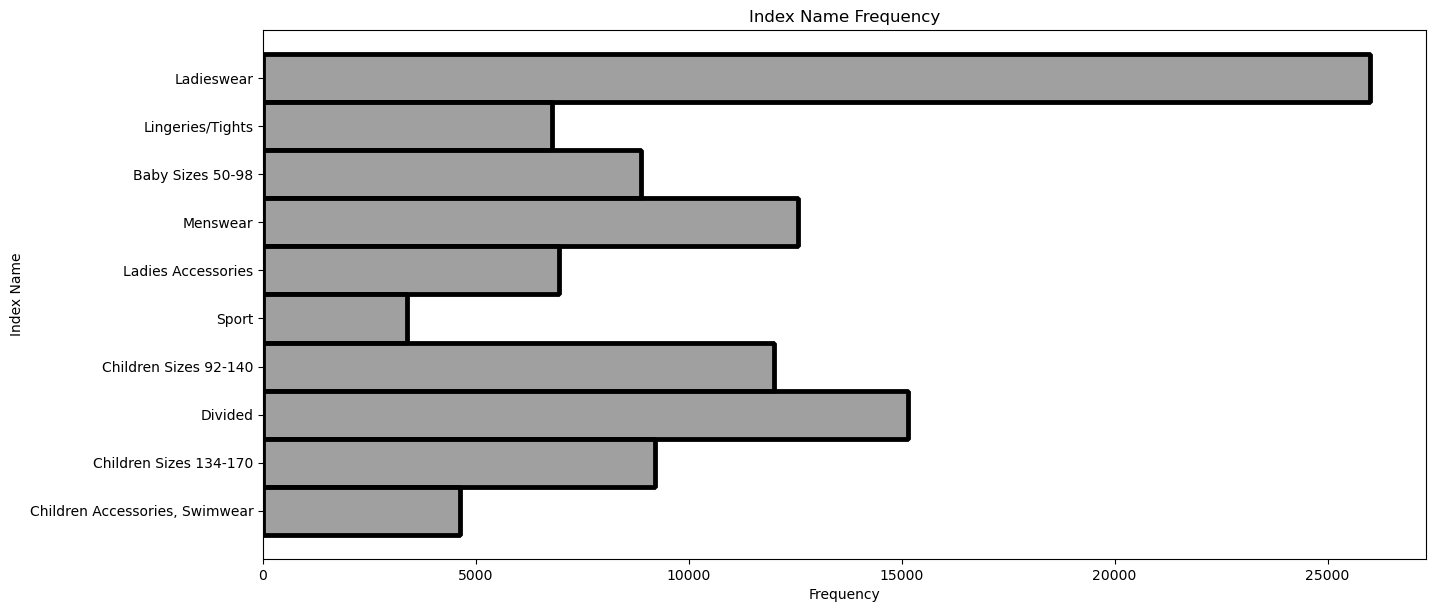

In [16]:
f, ax = plt.subplots(figsize=(15, 7), dpi =100)
ax = sns.histplot(data=articles, y='index_name', color='grey')
ax.set_xlabel('Frequency')
ax.set_ylabel('Index Name')
ax.set_title('Index Name Frequency')
plt.show()

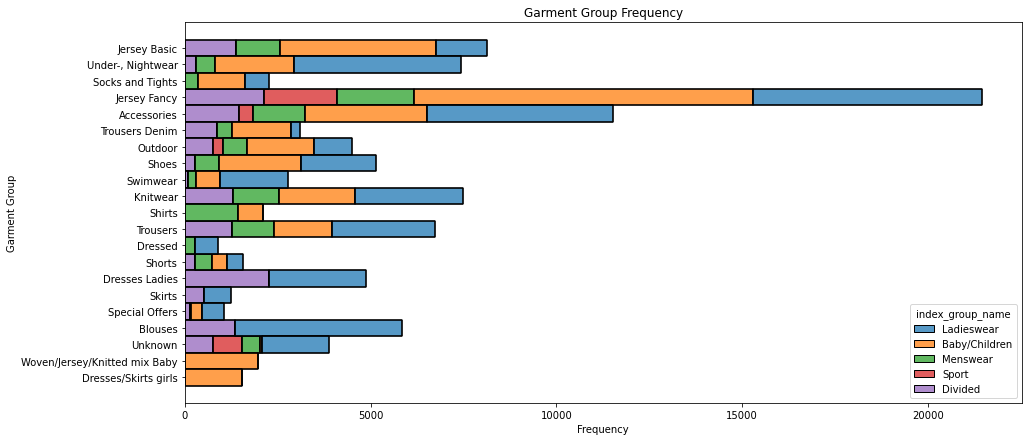

In [28]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('Frequency')
ax.set_ylabel('Garment Group')
ax.set_title('Garment Group Frequency')
plt.show()

In [25]:
articles.groupby(by = ['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

### Customer Data Description
- customer_id : A unique identifier of every customer
- FN : 1 or missed
- Active : 1 or missed
- club_member_status : Status in club
- fashion_news_frequency : How often H&M may send news to customer
- age : The current age
- postal_code : Postal code of customer

#### Preliminary Findings
- Mean and median of customers are 36 and 32 respectively
- Most of club members have active membership
- Customers prefer to be left alone

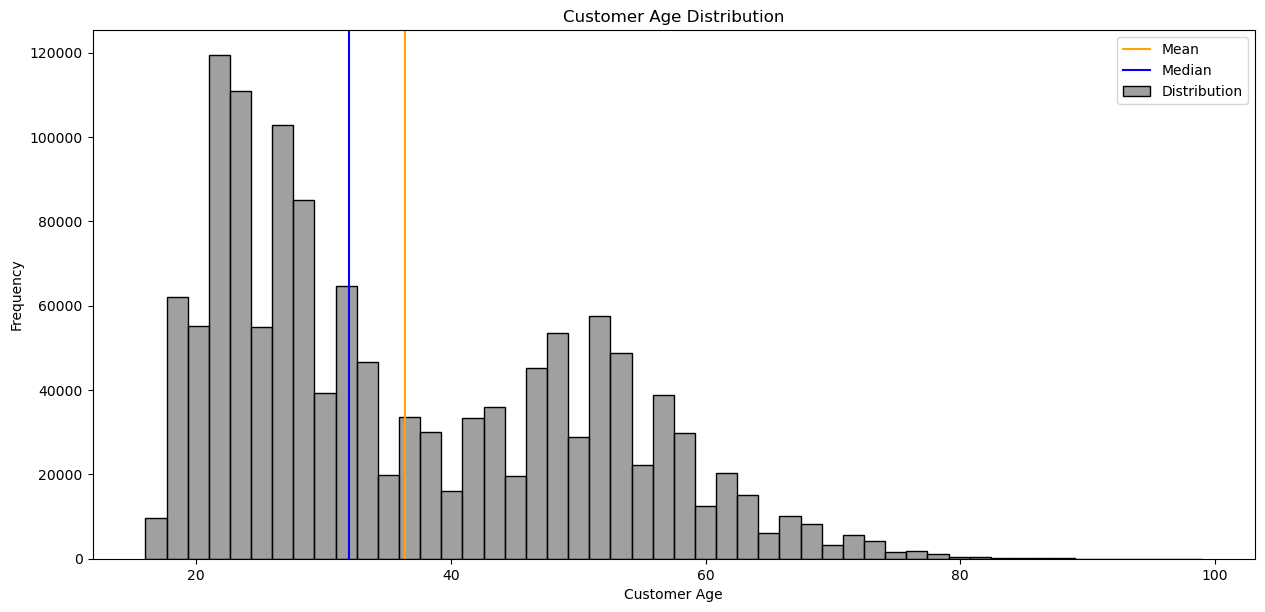

In [68]:
f, ax = plt.subplots(figsize=(15, 7), dpi =100)
ax = sns.histplot(data=customers, x='age', color='grey', bins = 50)
ax.set_xlabel('Customer Age')
ax.set_ylabel('Frequency')
ax.set_title('Customer Age Distribution')
ax.axvline(customers.age.mean(), color='orange')
ax.axvline(customers.age.median(), color='blue')
ax.legend(labels = ['Mean', 'Median', 'Distribution'])
plt.show()

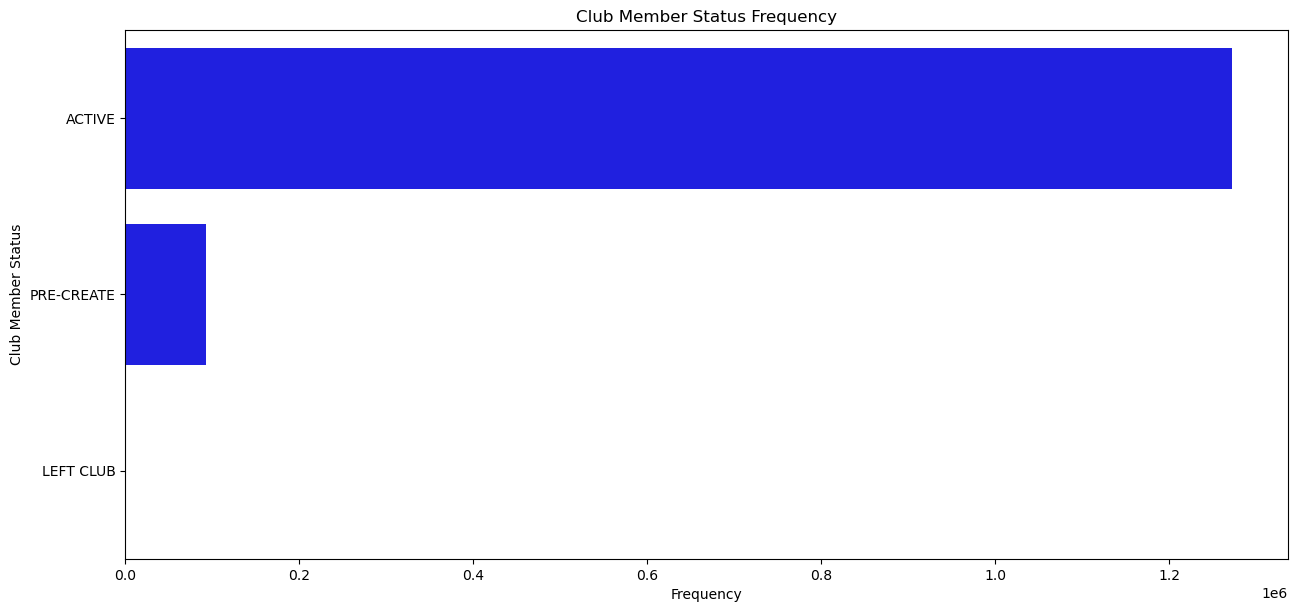

In [66]:
f, ax = plt.subplots(figsize=(15, 7), dpi =100)
ax = sns.countplot(data=customers, y='club_member_status', color='blue')
ax.set_xlabel('Frequency')
ax.set_ylabel('Club Member Status')
ax.set_title('Club Member Status Frequency')
plt.show()

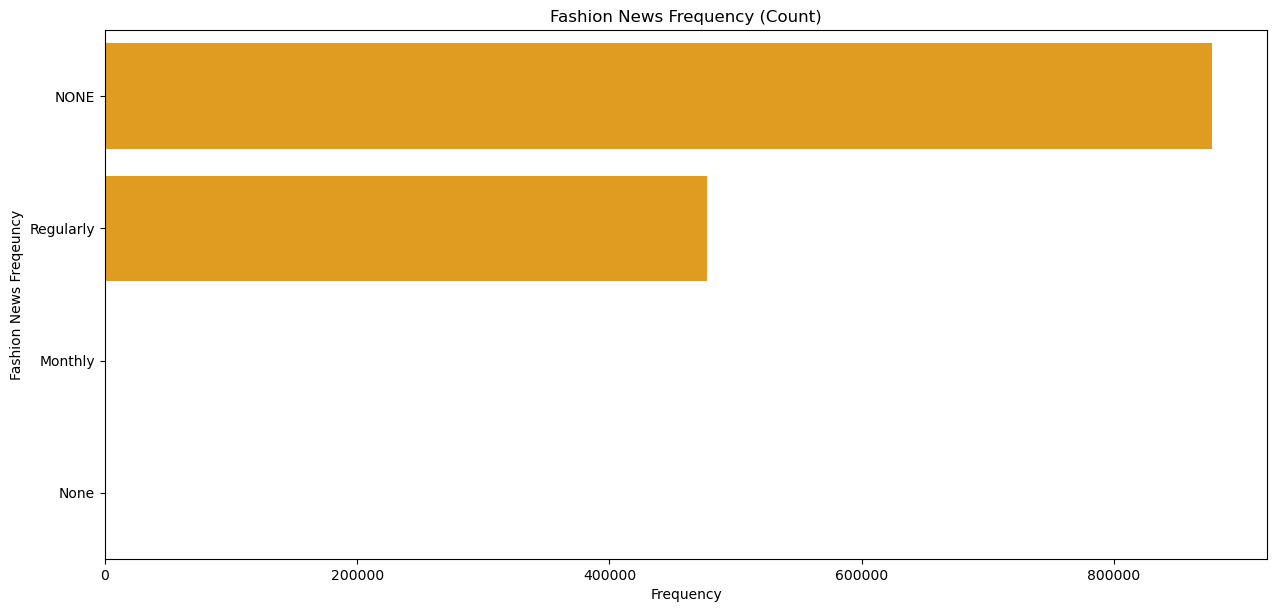

In [67]:
f, ax = plt.subplots(figsize=(15, 7), dpi =100)
ax = sns.countplot(data=customers, y='fashion_news_frequency', color='orange')
ax.set_xlabel('Frequency')
ax.set_ylabel('Fashion News Freqeuncy')
ax.set_title('Fashion News Frequency (Count)')
plt.show()

### Transactions Data Description
- t_dat : A unique identifier of every customer
- customer_id : A unique identifier of every customer (in customers table)
- article_id : A unique identifier of every article (in articles table)
- price : Price of purchase
- sales_channel_id : 1 or 2

#### Preliminary Findings
- There are some exteme outliers for price. The mean & median are very close to each other
- There is overall high variance for upper body, lower body, full body, and shoes
- Index with the highest mean price is ladieswear
- Product group with the highest mean price is shoes

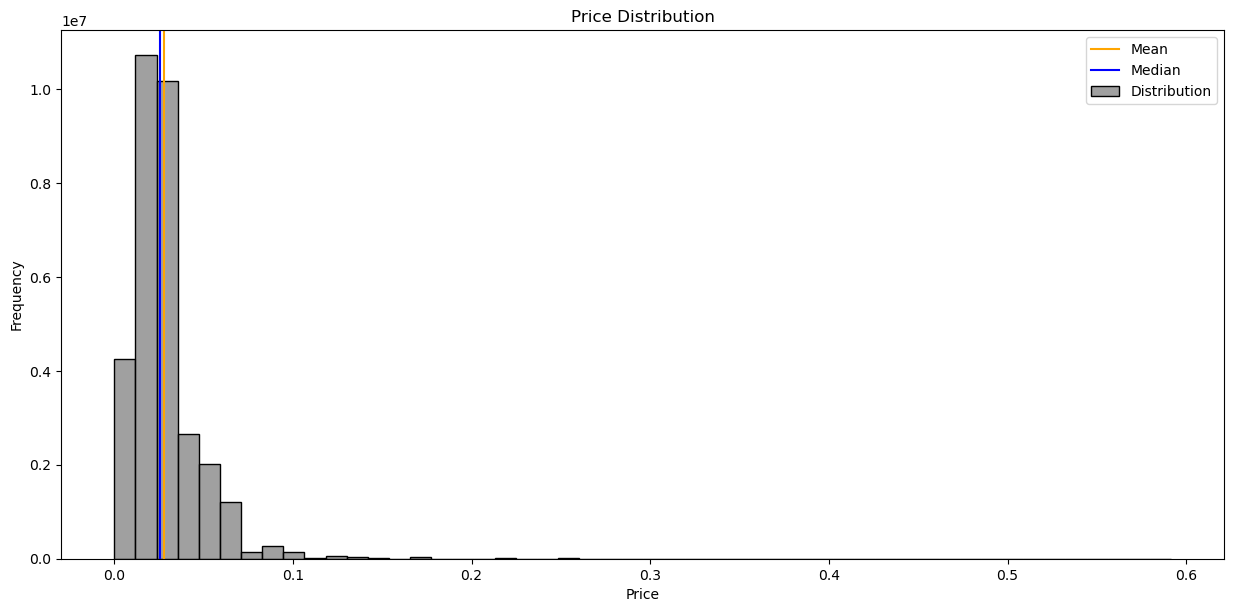

In [9]:
f, ax = plt.subplots(figsize=(15, 7), dpi =100)
ax = sns.histplot(data=transactions, x='price', color='grey', bins = 50)
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Price Distribution')
ax.axvline(transactions.price.mean(), color='orange')
ax.axvline(transactions.price.median(), color='blue')
ax.legend(labels = ['Mean', 'Median', 'Distribution'])
plt.show()

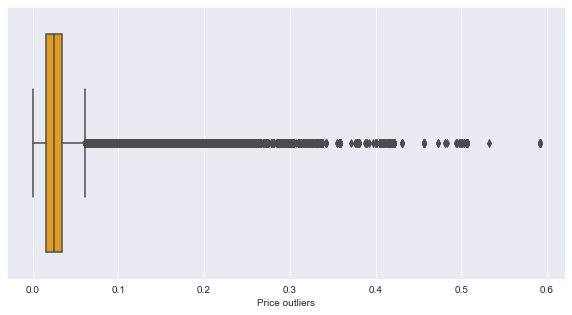

In [73]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

In [84]:
articles_merge = articles.loc[:, ['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name']]
trans2 = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_merge, on='article_id', how='left')

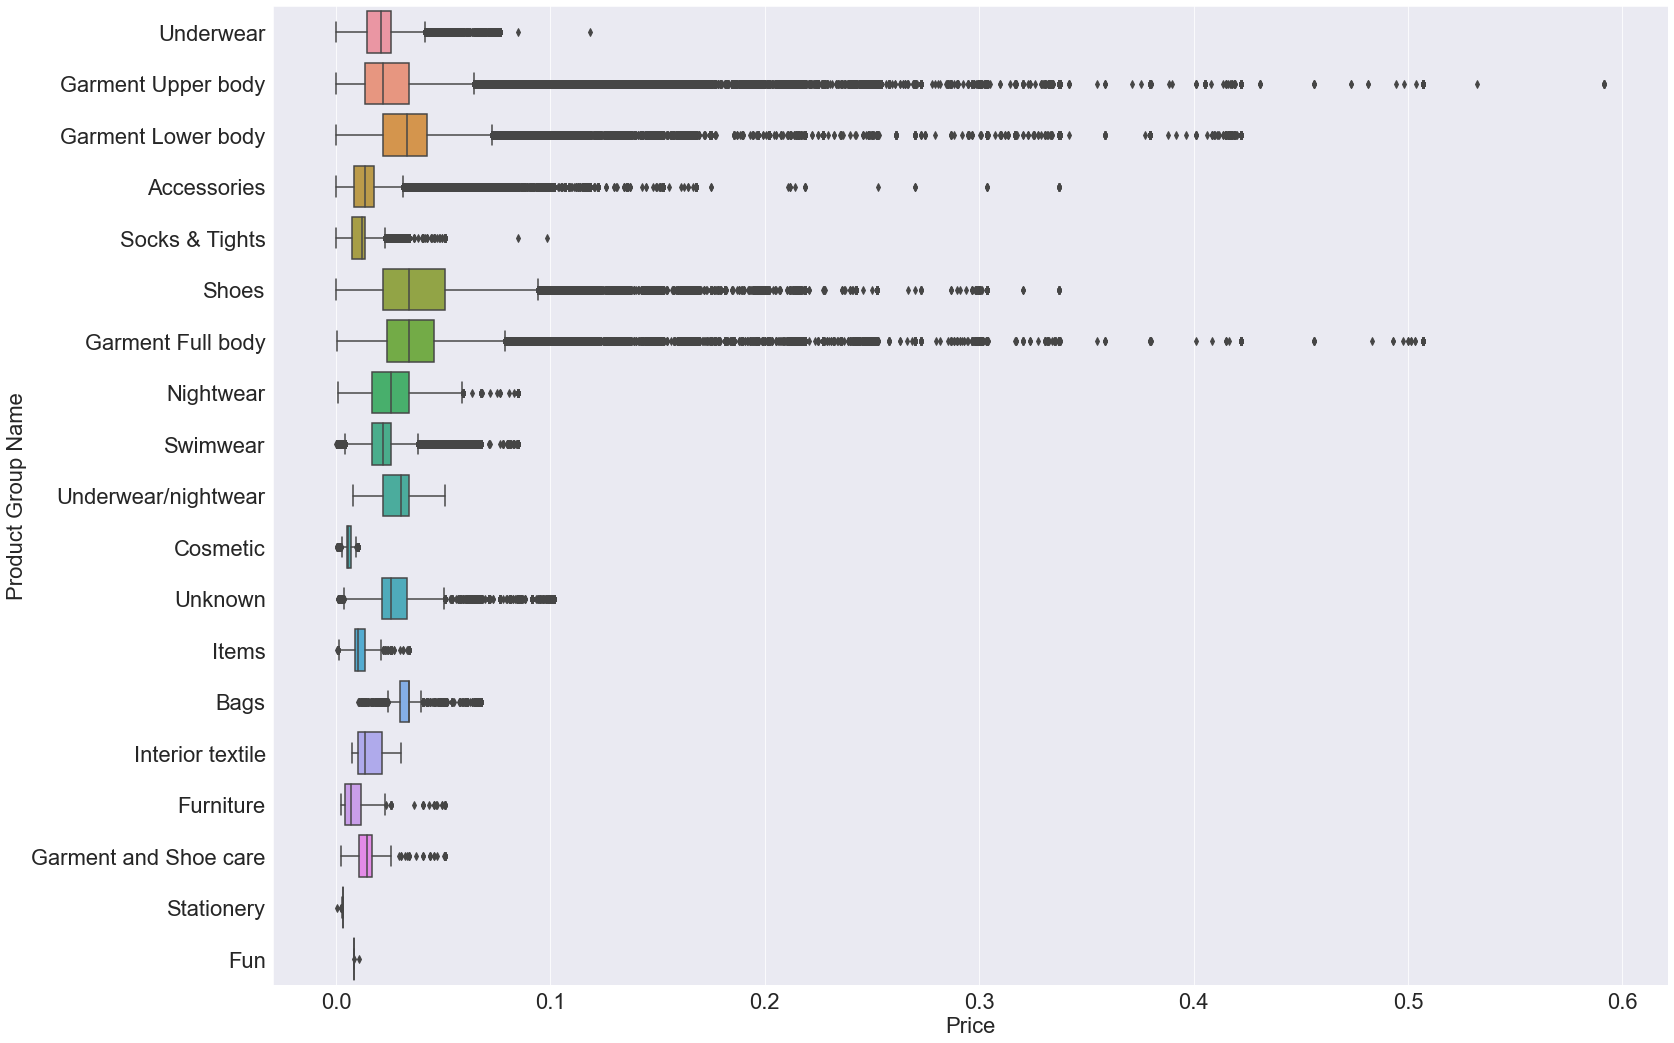

In [87]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=trans2, x='price', y='product_group_name')
ax.set_xlabel('Price', fontsize=22)
ax.set_ylabel('Product Group Name', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

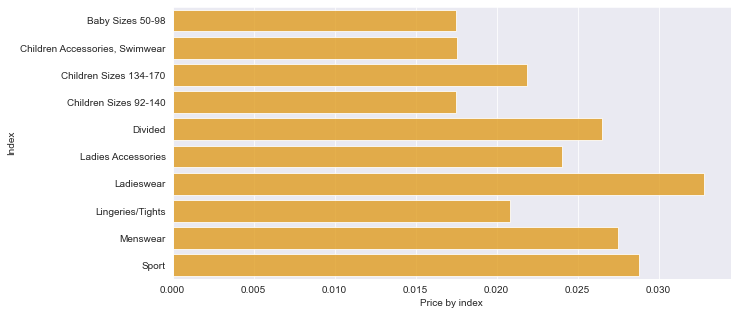

In [89]:
articles_index = trans2[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

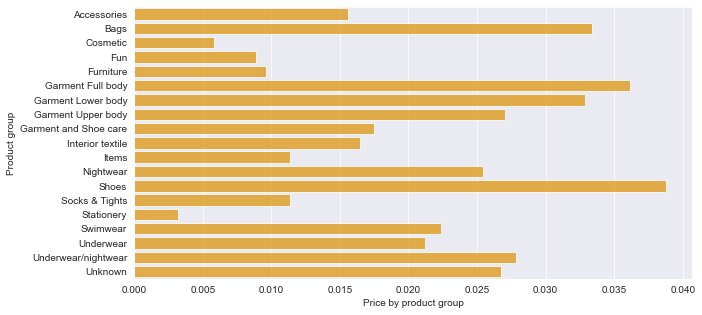

In [90]:
articles_index = trans2[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

In [93]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
